In [1]:
## This is a example of how you will be doing projects in python.
### Use markdown cells -OR- comments in cells to place AT LEAST the question number you are working on. 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

4. Using the pandas `read_csv()` method, read the GDP dataset into your notebook as a DataFrame called `gdp_df`. Take a look at the first few and last few rows to familiarize yourself with what is contained in this dataset.

In [3]:
gdp_df = pd.read_csv('../data/gdp_percapita.csv')

In [4]:
gdp_df.head()

,Country or Area,Year,Value,Value Footnotes
0,Afghanistan,2023,1992.424394,NaN
1,Afghanistan,2022,1981.710168,NaN
2,Afghanistan,2021,2144.166570,NaN
3,Afghanistan,2020,2769.685745,NaN
4,Afghanistan,2019,2927.245144,NaN


In [5]:
gdp_df.info

<bound method DataFrame.info of      Country or Area  Year        Value  Value Footnotes
0        Afghanistan  2023  1992.424394              NaN
1        Afghanistan  2022  1981.710168              NaN
2        Afghanistan  2021  2144.166570              NaN
3        Afghanistan  2020  2769.685745              NaN
4        Afghanistan  2019  2927.245144              NaN
...              ...   ...          ...              ...
8214        Zimbabwe  1994  3965.730986              NaN
8215        Zimbabwe  1993  3634.750494              NaN
8216        Zimbabwe  1992  3649.891947              NaN
8217        Zimbabwe  1991  4126.405247              NaN
8218        Zimbabwe  1990  4013.299059              NaN

[8219 rows x 4 columns]>

In [6]:
print(gdp_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8219 entries, 0 to 8218
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Country or Area  8219 non-null   object 
 1   Year             8219 non-null   int64  
 2   Value            8219 non-null   float64
 3   Value Footnotes  0 non-null      float64
dtypes: float64(2), int64(1), object(1)
memory usage: 257.0+ KB
None


In [7]:
5. How many rows and columns are in `gdp_df`? What are the data types of each column?

Object `column` not found.


8219 rows, 4 columns, dtypes: float64(2), int64(1), object(1)

6. Drop the `Value Footnotes` column and rename the remaining three to 'Country', 'Year', and 'GDP_Per_Capita'.

gdp_df.rename(columns={'Country or Area': 'Country', 'Year': 'Year', 'Value': 'GDP_Per_Capita'})
gdp_df.drop('Value Footnotes', axis=1)

In [8]:
gdp_df = gdp_df.rename(columns={'Country or Area': 'Country', 'Year': 'Year', 'Value': 'GDP_Per_Capita'}).drop(columns=['Value Footnotes'])
print(gdp_df.head()) 

       Country  Year  GDP_Per_Capita
0  Afghanistan  2023     1992.424394
1  Afghanistan  2022     1981.710168
2  Afghanistan  2021     2144.166570
3  Afghanistan  2020     2769.685745
4  Afghanistan  2019     2927.245144


In [9]:
print(gdp_df)

          Country  Year  GDP_Per_Capita
0     Afghanistan  2023     1992.424394
1     Afghanistan  2022     1981.710168
2     Afghanistan  2021     2144.166570
3     Afghanistan  2020     2769.685745
4     Afghanistan  2019     2927.245144
...           ...   ...             ...
8214     Zimbabwe  1994     3965.730986
8215     Zimbabwe  1993     3634.750494
8216     Zimbabwe  1992     3649.891947
8217     Zimbabwe  1991     4126.405247
8218     Zimbabwe  1990     4013.299059

[8219 rows x 3 columns]


7. How many countries have data for all years? Which countries are missing many years of data? Look at the number of observations per year. What do you notice? 

228 countries have data for all years.

Countries missing many years of data: 
Afghanistan                  24
Bhutan                       33
Cayman Islands               18
CuraÃ§ao                     24
Djibouti                     11
Faroe Islands                16
Greenland                    32
Kosovo                       16
Lebanon                      33
Montenegro                   27
San Marino                   26
Serbia                       29
Sint Maarten (Dutch part)    15
Somalia                      33
Syrian Arab Republic         33
Tonga                        33
Turks and Caicos Islands     13
Virgin Islands               21
West Bank and Gaza           30


The missing data for Afghanistan in the 1990s likely reflects the chaotic and war-torn conditions was experiencing during that time. 

In [10]:
print(gdp_df["Country"].value_counts())

Country
Latvia                       34
North America                34
Mongolia                     34
Morocco                      34
Mozambique                   34
                             ..
Faroe Islands                16
Kosovo                       16
Sint Maarten (Dutch part)    15
Turks and Caicos Islands     13
Djibouti                     11
Name: count, Length: 247, dtype: int64


In [11]:
country_year_counts = gdp_df.groupby('Country')['Year'].nunique() 

In [12]:
total_years = gdp_df['Year'].nunique()

In [13]:
countries_with_all_years = country_year_counts[country_year_counts == total_years]

In [14]:
print("Countries with data for all years:\n", countries_with_all_years)

Countries with data for all years:
 Country
Africa Eastern and Southern    34
Africa Western and Central     34
Albania                        34
Algeria                        34
Andorra                        34
                               ..
Vanuatu                        34
Viet Nam                       34
World                          34
Zambia                         34
Zimbabwe                       34
Name: Year, Length: 228, dtype: int64


In [15]:
countries_with_all_years_df = countries_with_all_years.reset_index()

print("Countries with data for all years:")
print(countries_with_all_years_df)

Countries with data for all years:
                         Country  Year
0    Africa Eastern and Southern    34
1     Africa Western and Central    34
2                        Albania    34
3                        Algeria    34
4                        Andorra    34
..                           ...   ...
223                      Vanuatu    34
224                     Viet Nam    34
225                        World    34
226                       Zambia    34
227                     Zimbabwe    34

[228 rows x 2 columns]


In [16]:
countries_missing_years = country_year_counts[country_year_counts < total_years]
print("Countries missing many years of data:\n", countries_missing_years)

Countries missing many years of data:
 Country
Afghanistan                  24
Bhutan                       33
Cayman Islands               18
CuraÃ§ao                     24
Djibouti                     11
Faroe Islands                16
Greenland                    32
Kosovo                       16
Lebanon                      33
Montenegro                   27
San Marino                   26
Serbia                       29
Sint Maarten (Dutch part)    15
Somalia                      33
Syrian Arab Republic         33
Tonga                        33
Turks and Caicos Islands     13
Virgin Islands               21
West Bank and Gaza           30
Name: Year, dtype: int64


In [17]:
observations_per_year = gdp_df.groupby('Year').size()
print("Number of observations per year:\n", observations_per_year)

Number of observations per year:
 Year
1990    233
1991    234
1992    234
1993    234
1994    235
1995    236
1996    236
1997    238
1998    238
1999    238
2000    240
2001    240
2002    241
2003    241
2004    241
2005    241
2006    242
2007    242
2008    244
2009    245
2010    245
2011    246
2012    246
2013    247
2014    247
2015    247
2016    247
2017    247
2018    247
2019    247
2020    247
2021    247
2022    246
2023    240
dtype: int64


In [18]:
import matplotlib.pyplot as plt

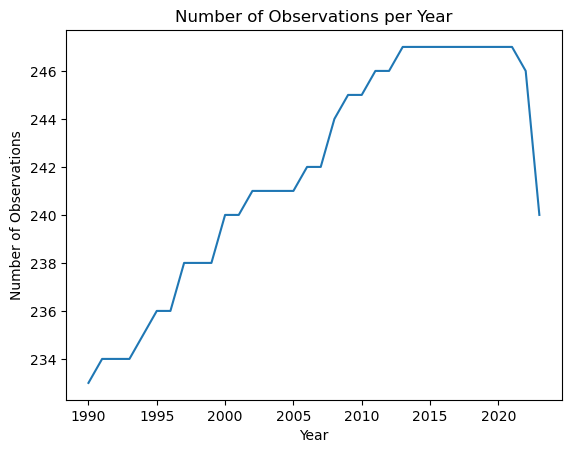

In [19]:
plt.plot(observations_per_year.index, observations_per_year.values)
plt.title('Number of Observations per Year')
plt.xlabel('Year')
plt.ylabel('Number of Observations')
plt.show()

In [20]:
afghanistan_years = gdp_df[gdp_df['Country'] == 'Afghanistan']['Year'].unique()
missing_years_afghanistan = set(range(1990, 2023)) - set(afghanistan_years)
print("Missing years for Afghanistan:", missing_years_afghanistan)

Missing years for Afghanistan: {1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999}


In [21]:
west_bank_and_gaza_years = gdp_df[gdp_df['Country'] == 'West Bank and Gaza']['Year'].unique()
missing_years_west_bank_and_gaza = set(range(1990, 2023)) - set(west_bank_and_gaza_years)
print("Missing years for West Bank and Gaza:", missing_years_west_bank_and_gaza)

Missing years for West Bank and Gaza: {1992, 1993, 1990, 1991}


In [22]:
djibouti_years = gdp_df[gdp_df['Country'] == 'Djibouti']['Year'].unique()
missing_years_djibouti = set(range(1990, 2023)) - set(djibouti_years)
print("Missing years for Djibouti:", missing_years_djibouti)

Missing years for Djibouti: {1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012}


8. In this question, you're going to create some plots to show the distribution of GDP per capita for the year 2020. Go to the Python Graph Gallery (https://www.python-graph-gallery.com/) and look at the different types of plots under the Distribution section. Create a histogram, a density plot, a boxplot, and a violin plot. What do you notice when you look at these plots? How do the plots compare and what information can you get out of one type that you can't necessarily get out of the others?


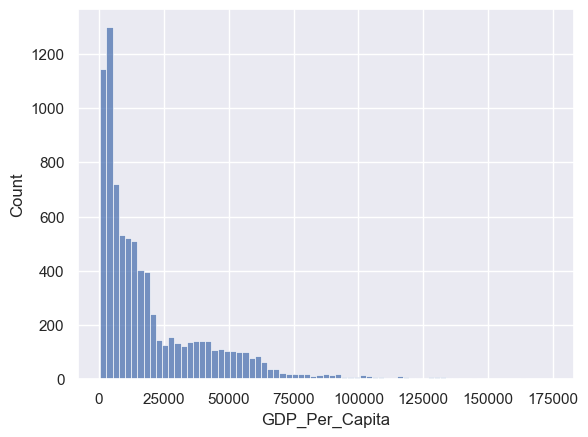

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt
  
sns.set_theme(style="darkgrid")


sns.histplot(data=gdp_df, x="GDP_Per_Capita")
plt.show()

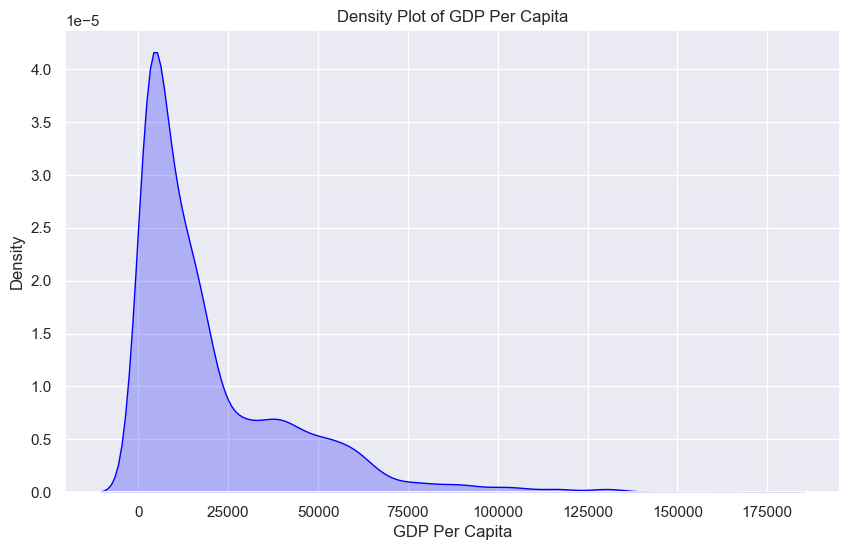

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style="darkgrid")

plt.figure(figsize=(10, 6))
sns.kdeplot(data=gdp_df, x="GDP_Per_Capita", fill=True, color='blue')

plt.title('Density Plot of GDP Per Capita')
plt.xlabel('GDP Per Capita')
plt.ylabel('Density')
plt.show()

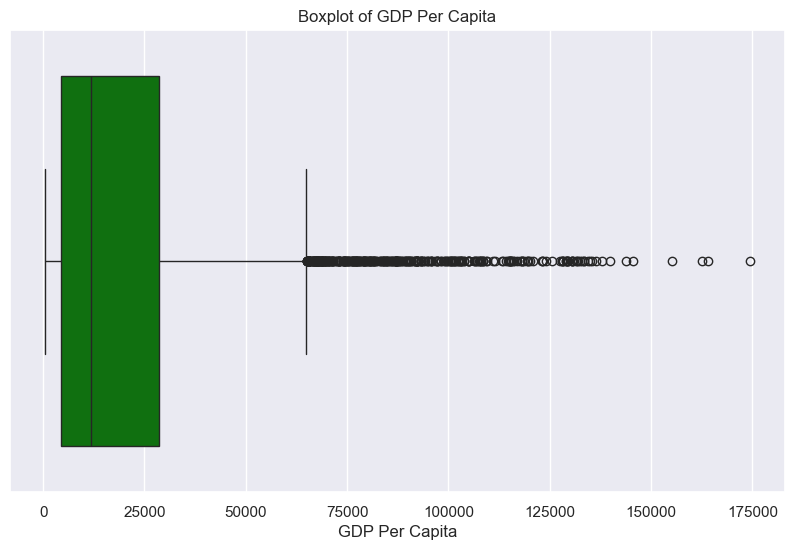

In [25]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=gdp_df['GDP_Per_Capita'], color='green')

plt.title('Boxplot of GDP Per Capita')
plt.xlabel('GDP Per Capita')
plt.show()

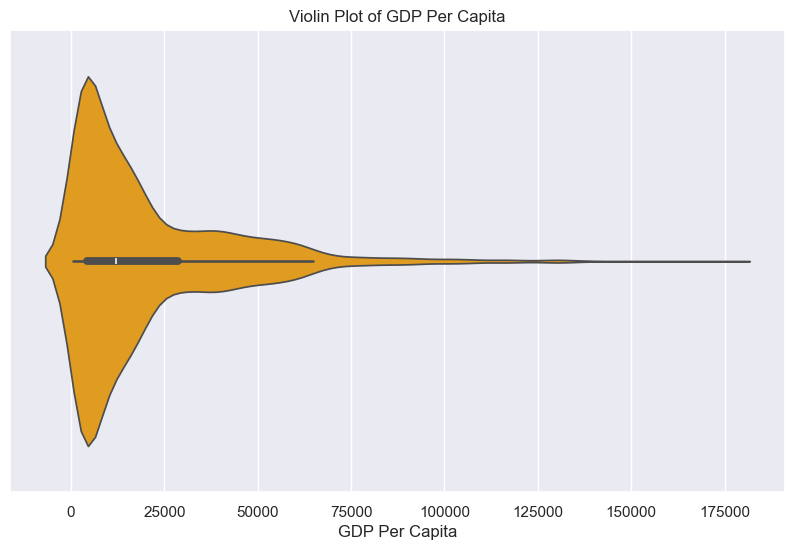

In [26]:
plt.figure(figsize=(10, 6))
sns.violinplot(x=gdp_df['GDP_Per_Capita'], color='orange')

plt.title('Violin Plot of GDP Per Capita')
plt.xlabel('GDP Per Capita')
plt.show()

Among these visualizations, the histogram and density plot offer the most intuitive representation of GDP per capita distribution, making them particularly accessible for general interpretation. The histogram effectively conveys frequency distributions, while the density plot provides a smooth estimate of data concentration. In contrast, the boxplot, while statistically informative, may be less intuitive for the average viewer due to its abstract representation of quartiles, medians, and outliers. Understanding the significance of whiskers and interquartile ranges requires a deeper familiarity with statistical concepts, which may pose a challenge for non-technical audiences.

9. What was the median GDP per capita value in 2020?

In [27]:
gdp_2020 = gdp_df[gdp_df['Year'] == 2020]
median_gdp_2020 = gdp_2020['GDP_Per_Capita'].median()
print("Median GDP per captia in 2020:", median_gdp_2020)

Median GDP per captia in 2020: 15309.23598817024


Median GDP per captia in 2020: 15309.23598817024

10. For this question, you're going to create some visualizations to compare GDP per capita values for the years 1990, 2000, 2010, and 2020. Start by subsetting your data to just these 4 years into a new DataFrame named gdp_decades. Using this, create the following 4 plots:
	* A boxplot
	* A barplot (check out the Barplot with Seaborn section: https://www.python-graph-gallery.com/barplot/#Seaborn)
	* A scatterplot
	* A scatterplot with a trend line overlaid (see this regplot example: https://www.python-graph-gallery.com/42-custom-linear-regression-fit-seaborn)  
Comment on what you observe has happened to GDP values over time and the relative strengths and weaknesses of each type of plot.


In [28]:
gdp_decades = gdp_df[gdp_df['Year'].isin([1990, 2000, 2010, 2020])]
print(gdp_decades)


                          Country  Year  GDP_Per_Capita
3                     Afghanistan  2020     2769.685745
13                    Afghanistan  2010     2848.586061
23                    Afghanistan  2000     1617.826475
27    Africa Eastern and Southern  2020     3861.111238
37    Africa Eastern and Southern  2010     3863.836012
...                           ...   ...             ...
8184                       Zambia  1990     2425.111287
8188                     Zimbabwe  2020     2987.269823
8198                     Zimbabwe  2010     2572.769992
8208                     Zimbabwe  2000     4071.022001
8218                     Zimbabwe  1990     4013.299059

[965 rows x 3 columns]


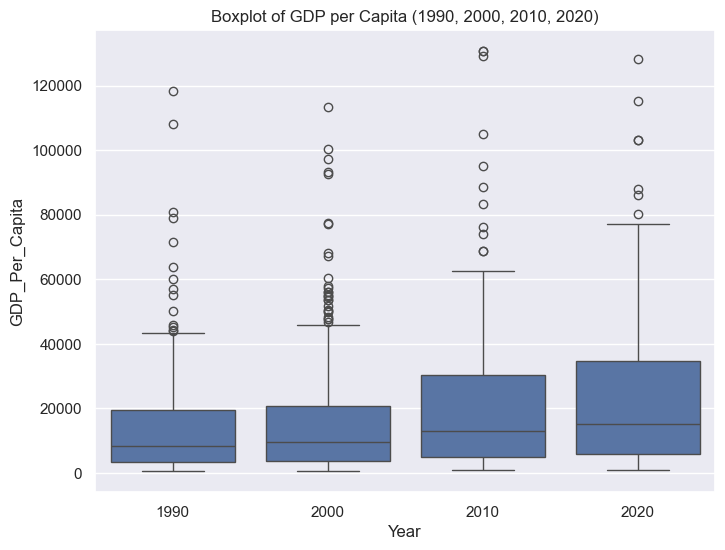

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
sns.boxplot(x='Year', y='GDP_Per_Capita', data=gdp_decades)
plt.title('Boxplot of GDP per Capita (1990, 2000, 2010, 2020)')
plt.show()

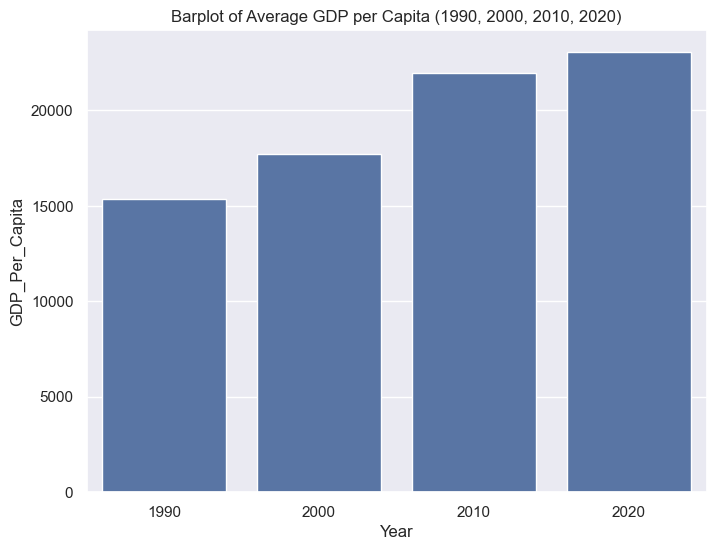

In [30]:
plt.figure(figsize=(8,6))
sns.barplot(x='Year', y='GDP_Per_Capita', data=gdp_decades, errorbar=None)
plt.title('Barplot of Average GDP per Capita (1990, 2000, 2010, 2020)')
plt.show()

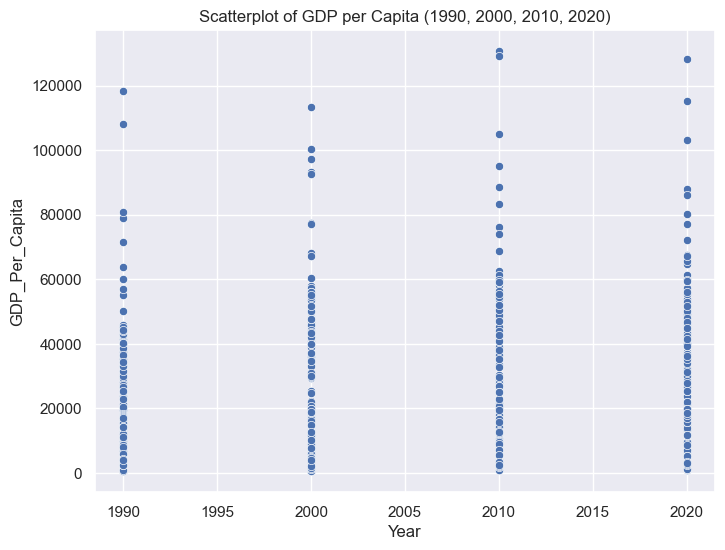

In [31]:
plt.figure(figsize=(8,6))
sns.scatterplot(x='Year', y='GDP_Per_Capita', data=gdp_decades)
plt.title('Scatterplot of GDP per Capita (1990, 2000, 2010, 2020)')
plt.show()

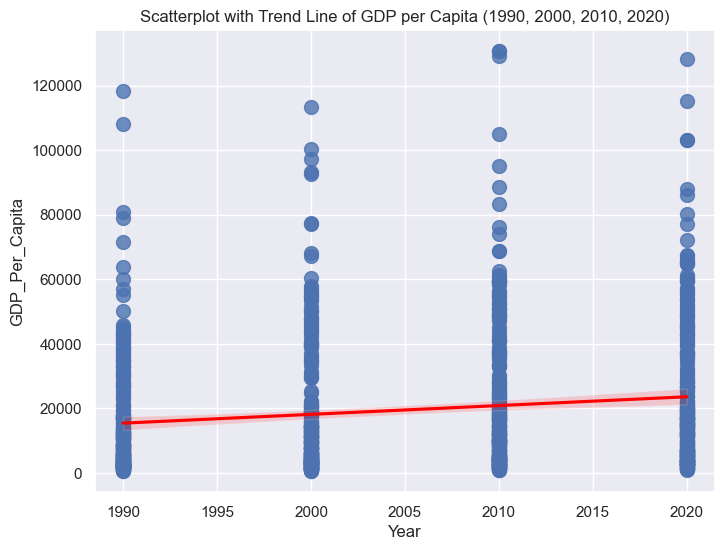

In [32]:
plt.figure(figsize=(8,6))
sns.regplot(x='Year', y='GDP_Per_Capita', data=gdp_decades, scatter_kws={'s': 100}, line_kws={'color':'red'})
plt.title('Scatterplot with Trend Line of GDP per Capita (1990, 2000, 2010, 2020)')
plt.show()

The barplot and regplot are effective for illustrating the overall trends in GDP per capita over time, providing clear visual representations of the upward trajectory in average values. In contrast, the boxplot and scatterplot offer more insight into the variation within the individual data points for each country, highlighting differences in distribution and the spread of GDP per capita. While each plot emphasizes distinct aspects of the data, all four visualizations collectively demonstrate a consistent increase in GDP per capita over time, confirming the general economic growth across the selected years.

11. Which country was the first to have a GDP per capita greater than $100,000?

In [33]:
gdp_above_100k = gdp_df[gdp_df['GDP_Per_Capita'] > 100000]
sorted_gdp = gdp_above_100k.sort_values(by=['Year'])
first_country_100k = sorted_gdp.iloc[0]
print(f"The first country to have a GDP per capita greater than $100,000 was {first_country_100k['Country']} in {first_country_100k['Year']} with a GDP per capita of {first_country_100k['GDP_Per_Capita']:.2f}")

The first country to have a GDP per capita greater than $100,000 was United Arab Emirates in 1990 with a GDP per capita of 108057.04


The first country to have a GDP per capita greater than $100,000 was United Arab Emirates in 1990 with a GDP per capita of 108057.04

12. Which country had the highest GDP per capita in 2020? Create a plot showing how this country's GDP per capita has changed over the timespan of the dataset.

In [34]:
gdp_2020 = gdp_df[gdp_df['Year'] == 2020]
highest_gdp_2020 = gdp_2020.loc[gdp_2020['GDP_Per_Capita'].idxmax()]
highest_country = highest_gdp_2020['Country']
highest_gdp_value_2020 = highest_gdp_2020['GDP_Per_Capita']
print(f"The country with the highest GDP per capita in 2020 is {highest_country} with a GDP per capita of {highest_gdp_value_2020:.2f}")

The country with the highest GDP per capita in 2020 is Luxembourg with a GDP per capita of 128256.56


The country with the highest GDP per capita in 2020 is Luxembourg with a GDP per capita of 128256.56

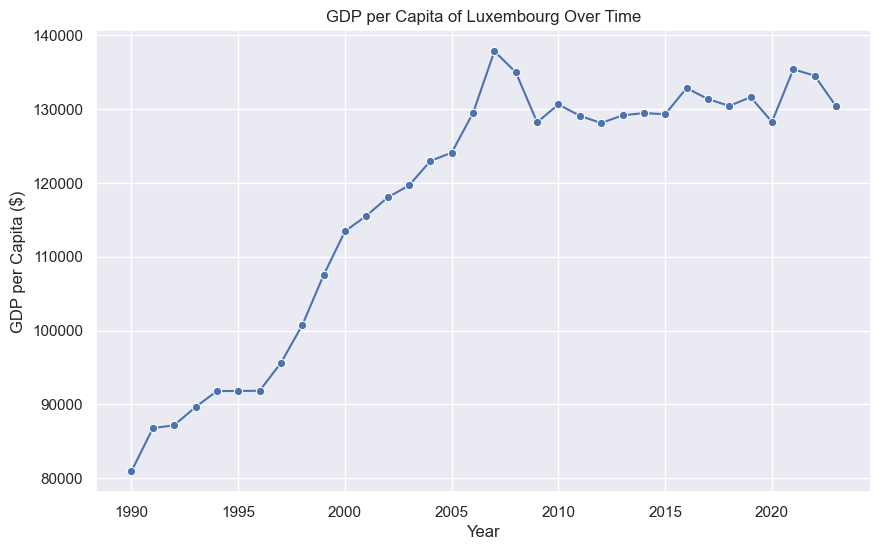

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns
country_data = gdp_df[gdp_df['Country'] == highest_country]
plt.figure(figsize=(10,6))
sns.lineplot(x='Year', y='GDP_Per_Capita', data=country_data, marker='o')
plt.title(f"GDP per Capita of {highest_country} Over Time")
plt.xlabel('Year')
plt.ylabel('GDP per Capita ($)')
plt.grid(True)
plt.show()

13. Which country had the lowest GDP per capita in 2020? Create a plot showing how this country's GDP per capita has changed over the timespan of the dataset. **Bonus question:** Is it true in general that coutries had a higher GDP per capita in 2020 than in 1990? Which countries had lower GDP per capita in 2020 than in 1990?

In [36]:
gdp_2020 = gdp_df[gdp_df['Year'] == 2020]
lowest_gdp_2020 = gdp_2020.loc[gdp_2020['GDP_Per_Capita'].idxmin()]
lowest_country = lowest_gdp_2020['Country']
lowest_gdp_value_2020 = lowest_gdp_2020['GDP_Per_Capita']
print(f"The country with the lowest GDP per capita in 2020 is {lowest_country} with a GDP per capita of {lowest_gdp_value_2020:.2f}")

The country with the lowest GDP per capita in 2020 is Burundi with a GDP per capita of 833.92


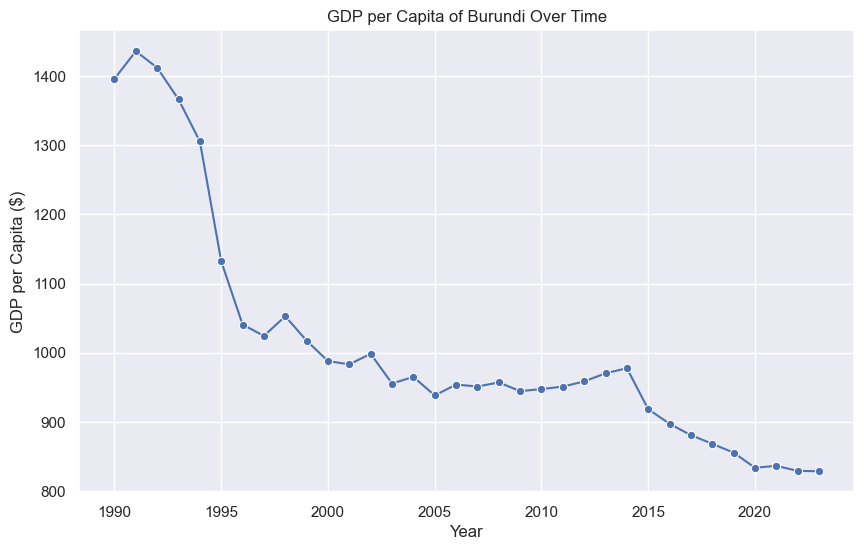

In [37]:
country_data_lowest = gdp_df[gdp_df['Country'] == lowest_country]
plt.figure(figsize=(10,6))
sns.lineplot(x='Year', y='GDP_Per_Capita', data=country_data_lowest, marker='o')
plt.title(f"GDP per Capita of {lowest_country} Over Time")
plt.xlabel('Year')
plt.ylabel('GDP per Capita ($)')
plt.grid(True)
plt.show()

In [38]:
gdp_comparison = gdp_df[gdp_df['Year'].isin([1990, 2020])]
gdp_pivot = gdp_comparison.pivot_table(index='Country', columns='Year', values='GDP_Per_Capita')
lower_gdp_in_2020 = gdp_pivot[gdp_pivot[2020] < gdp_pivot[1990]]
print(f"Countries with lower GDP per capita in 2020 than in 1990:\n{lower_gdp_in_2020}")

Countries with lower GDP per capita in 2020 than in 1990:
Year                                               1990          2020
Country                                                              
Aruba                                      34579.220640  28521.688852
Barbados                                   16976.761648  15749.038017
Brunei                                    118163.683198  80280.897948
Burundi                                     1396.077627    833.920257
Central African Republic                    1481.252551   1136.570530
Congo                                       8699.526839   6350.509134
Dem. Rep. Congo                             2172.001597   1277.632863
Fragile and conflict affected situations    6062.707946   5271.014406
Gabon                                      23884.810700  18681.484074
Haiti                                       3946.365646   3229.475544
Kyrgyz Republic                             6095.681086   5537.795885
Liberia                         

Between 1990 and 2020, most countries grew richer, but some—especially those with wars, unstable governments, or economies that depend heavily on one thing (like oil)—actually got poorer. This shows that peace, a diverse economy, and good leadership are key to long-term growth.

14. Read in the internet use dataset into a DataFrame named `internet_df`. You will likely get errors when doing this. Check the arguments for the read_csv function to find ones that can help correct the errors (https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html) Once you are able to read it in, take per a look at the top and bottom few rows to make sure that it has been read in correctly. Also, check the datatypes of the columns.

In [39]:
import pandas as pd

In [40]:
internet_df = pd.read_csv('../data/internet_use.csv', header =0, nrows=6083)

In [41]:
print(internet_df.head(6083))

     Country or Area  Year      Value Value Footnotes
0        Afghanistan  2019  17.600000               1
1        Afghanistan  2018  16.800000               2
2        Afghanistan  2017  13.500000               3
3        Afghanistan  2016  11.000000               4
4        Afghanistan  2015   8.260000               4
...              ...   ...        ...             ...
6078        Zimbabwe  1997   0.033080             NaN
6079        Zimbabwe  1996   0.016790             NaN
6080        Zimbabwe  1995   0.007684             NaN
6081        Zimbabwe  1994   0.001739             NaN
6082        Zimbabwe  1990   0.000000             NaN

[6083 rows x 4 columns]


In [42]:
print(internet_df.dtypes)

Country or Area     object
Year                 int64
Value              float64
Value Footnotes     object
dtype: object


15. Drop the `Value Footnotes` column and rename the remaining three to 'Country', 'Year', and 'Internet_Users_Pct'.


In [43]:
internet_df = internet_df.drop(columns=['Value Footnotes'])

In [44]:
print(internet_df.head())

  Country or Area  Year  Value
0     Afghanistan  2019  17.60
1     Afghanistan  2018  16.80
2     Afghanistan  2017  13.50
3     Afghanistan  2016  11.00
4     Afghanistan  2015   8.26


In [45]:
internet_df = internet_df.rename(columns={'Country or Area': 'Country', 'Year': 'Year', 'Value': 'Internet_Users_Pct'})

In [46]:
print(internet_df.head())

       Country  Year  Internet_Users_Pct
0  Afghanistan  2019               17.60
1  Afghanistan  2018               16.80
2  Afghanistan  2017               13.50
3  Afghanistan  2016               11.00
4  Afghanistan  2015                8.26


16. Look at the number of observations in this dataset per year. What do you notice?

In [47]:
observations_per_year = internet_df.groupby('Year')['Country'].count()
print(observations_per_year)

Year
1990    226
1991     39
1992     50
1993     66
1994     92
1995    141
1996    177
1997    188
1998    195
1999    207
2000    210
2001    212
2002    214
2003    208
2004    210
2005    212
2006    212
2007    217
2008    214
2009    214
2010    209
2011    214
2012    209
2013    203
2014    204
2015    203
2016    206
2017    205
2018    174
2019    185
2020    186
2021    186
2022    184
2023     11
Name: Country, dtype: int64


In [48]:
new_observation = internet_df[internet_df['Internet_Users_Pct'] >= 0.0001].groupby('Year')['Country'].count()
print(new_observation)

Year
1990     19
1991     30
1992     43
1993     55
1994     80
1995    127
1996    172
1997    186
1998    194
1999    206
2000    209
2001    211
2002    212
2003    207
2004    209
2005    211
2006    211
2007    216
2008    213
2009    213
2010    208
2011    213
2012    208
2013    203
2014    204
2015    203
2016    206
2017    205
2018    174
2019    185
2020    186
2021    186
2022    184
2023     11
Name: Country, dtype: int64


After observing an improbable 226 country entries for 1990, I applied a >0.0001% adoption filter to eliminate questionable low-value data points. The post-2018 downward trend appears to reflect data reporting gaps rather than true declines in internet access.

17. What is the first year to have a non-zero internet users percentage value?

In [49]:
first_non_zero_per_country = internet_df[internet_df['Internet_Users_Pct'] > 0].groupby('Country')['Year'].min()

In [50]:
print(first_non_zero_per_country.sort_values())

Country
Finland                 1990
United States           1990
Denmark                 1990
Korea (Republic  of)    1990
Japan                   1990
                        ... 
Montserrat              2006
South Sudan             2013
Curacao                 2016
Kosovo                  2017
Vatican                 2019
Name: Year, Length: 227, dtype: int64


In [51]:
first_non_zero_per_country_b = internet_df[internet_df['Internet_Users_Pct'] > 0].groupby('Country')['Year'].min()
print(first_non_zero_per_country_b)

Country
Afghanistan            2001
Albania                1995
Algeria                1994
Andorra                1996
Angola                 1996
                       ... 
Virgin Islands (US)    1994
Wallis and Futuna      1999
Yemen                  1996
Zambia                 1994
Zimbabwe               1994
Name: Year, Length: 227, dtype: int64


first_year_overall = internet_df[internet_df['Internet_Users_Pct'] > 1e-10]['Year'].min()
print(first_year_overall)

18. How does the distribution of internet users percent differ for 2000 and 2014?

In [52]:
df_2000 = internet_df[internet_df['Year'] == 2000]['Internet_Users_Pct']
df_2014 = internet_df[internet_df['Year'] == 2014]['Internet_Users_Pct']
print("2000 Statistics:")
print(df_2000.describe())
print("2014 Statistics:")
print(df_2014.describe())

2000 Statistics:
count    210.000000
mean       9.332385
std       13.644205
min        0.000000
25%        0.482059
50%        2.886680
75%       10.539025
max       58.620700
Name: Internet_Users_Pct, dtype: float64
2014 Statistics:
count    204.000000
mean      45.604925
std       29.295667
min        0.990000
25%       17.403300
50%       46.818000
75%       70.262500
max       98.158000
Name: Internet_Users_Pct, dtype: float64


19. For how many countries was the percentage of internet users below 5% in 2014?

In [53]:
below_five = internet_df[(internet_df['Year'] == 2014) & (internet_df['Internet_Users_Pct'] < 5.0)]
print(below_five[['Country', 'Internet_Users_Pct']])

                               Country  Internet_Users_Pct
873                            Burundi             1.04239
1033          Central African Republic             2.70000
1061                              Chad             2.90000
1517  Democratic Republic of the Congo             3.00000
1782                           Eritrea             0.99000
2451                     Guinea-Bissau             3.32000
3364                        Madagascar             3.70000
4073                             Niger             1.24868
5055                           Somalia             1.63000
5116                       South Sudan             2.60000


In [54]:
print(below_five['Country'].tolist())

['Burundi', 'Central African Republic', 'Chad', 'Democratic Republic of the Congo', 'Eritrea', 'Guinea-Bissau', 'Madagascar', 'Niger', 'Somalia', 'South Sudan']


In [55]:
below_five = internet_df[(internet_df['Year'] == 2014) & (internet_df['Internet_Users_Pct'] < 5.0)]
print(f"Number of countries below 5%: {len(below_five)}")

Number of countries below 5%: 10


20. Merge the two DataFrames to one. Do this in a way that keeps **all rows** from each of the two DataFrames. Call the new DataFrame `gdp_and_internet_use`. Look at the first and last few rows to confirm that it merged correctly.

In [56]:
gdp_and_internet_use = pd.merge(
    internet_df,
    gdp_df,
    on=['Country', 'Year'], 
    how= 'outer',
    indicator=True)

print("First 5 rows:")
print(gdp_and_internet_use.head())
print("\nLast 5 rows:")
print(gdp_and_internet_use.tail())


print("\nMerge composition:")
print(gdp_and_internet_use['_merge'].value_counts())


First 5 rows:
       Country  Year  Internet_Users_Pct  GDP_Per_Capita      _merge
0  Afghanistan  1990            0.000000             NaN   left_only
1  Afghanistan  2000                 NaN     1617.826475  right_only
2  Afghanistan  2001            0.004723     1454.110782        both
3  Afghanistan  2002            0.004561     1774.308743        both
4  Afghanistan  2003            0.087891     1815.928200        both

Last 5 rows:
       Country  Year  Internet_Users_Pct  GDP_Per_Capita      _merge
9494  Zimbabwe  2019             26.5883     3294.806084        both
9495  Zimbabwe  2020             29.2986     2987.269823        both
9496  Zimbabwe  2021             32.4616     3184.785451        both
9497  Zimbabwe  2022             32.5615     3323.121932        both
9498  Zimbabwe  2023                 NaN     3442.251327  right_only

Merge composition:
_merge
both          4803
right_only    3416
left_only     1280
Name: count, dtype: int64


21. Find the three countries with the highest internet users percentage in 2014. Use a seaborn FacetGrid (https://seaborn.pydata.org/generated/seaborn.FacetGrid.html) to compare how the GDP per capita has changed over time for these three countries. What do you notice?


In [57]:
top_2014 = (
    gdp_and_internet_use[gdp_and_internet_use['Year'] == 2014]
    .nlargest(3, 'Internet_Users_Pct'))

top_countries = top_2014['Country'].tolist()
print(f"Top 3 countries in 2014:\n{top_2014[['Country', 'Internet_Users_Pct']]}")

Top 3 countries in 2014:
                          Country  Internet_Users_Pct
3944                      Iceland              98.158
2867  Falkland (Malvinas) Islands              97.600
824                       Bermuda              96.800


In [74]:
top_countries = (
    gdp_and_internet_use_2014.nlargest(3, 'Internet_Users_Pct')['Country'].tolist())

trend_data = gdp_and_internet_use[
    (gdp_and_internet_use['Country'].isin(top_countries)) &
    (gdp_and_internet_use['GDP_Per_Capita'].notna())]


print(f"GDP ranges for top countries:\n{trend_data.groupby('Country')['GDP_Per_Capita'].agg(['min', 'max'])}")


GDP ranges for top countries:
                  min           max
Country                            
Bermuda  75160.932166  117742.11895
Iceland  37720.719265   66880.06581


In [75]:
print(f"GDP ranges for top countries:\n{trend_data.groupby('Country')['GDP_Per_Capita'].agg(['min', 'max'])}")

GDP ranges for top countries:
                  min           max
Country                            
Bermuda  75160.932166  117742.11895
Iceland  37720.719265   66880.06581


In [ ]:
plt.figure(figsize=(10, 5))
ax = sns.lineplot(
    data=gdp_and_internet_use[gdp_and_internet_use['Country'].isin(top_countries)],
    x='Year',
    y='Internet_Users_Pct', 
    hue='Country',
    style='Country',
    markers=True,
    dashes=False)

plt.title("Internet Usage for Top 3 Countries (GDP Data Missing for Falklands)")
plt.ylabel("Internet Users (%)")
plt.axvline(2014, color='gray', linestyle='--', alpha=0.5)  
plt.grid(alpha=0.3)
plt.legend(bbox_to_anchor=(1.05, 1))
plt.show()

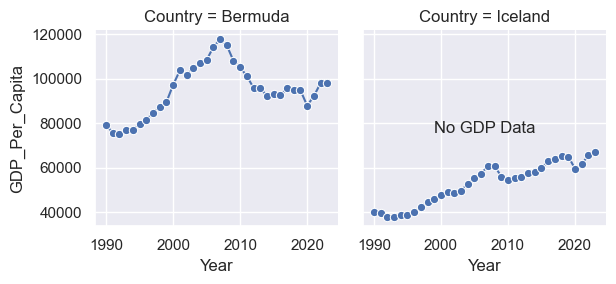

In [76]:
g = sns.FacetGrid(trend_data, col='Country', col_wrap=3)
g.map(sns.lineplot, 'Year', 'GDP_Per_Capita', marker='o', errorbar=None)


for ax, country in zip(g.axes.flat, top_countries):
    if trend_data[trend_data['Country']==country]['GDP_Per_Capita'].isna().all():
        ax.text(0.5, 0.5, 'No GDP Data', ha='center', va='center', transform=ax.transAxes)

plt.show()

22. Subset `gdp_and_internet_use` to just the year 2014. Save this as a new dataframe named `gdp_and_internet_use_2014`.


In [64]:
gdp_and_internet_use_2014 = gdp_and_internet_use[gdp_and_internet_use['Year'] == 2014].copy()

print(f"2014 subset contains {len(gdp_and_internet_use_2014)} rows")
print(gdp_and_internet_use_2014[['Country', 'Year', 'Internet_Users_Pct', 'GDP_Per_Capita']].head())

2014 subset contains 285 rows
                         Country  Year  Internet_Users_Pct  GDP_Per_Capita
15                   Afghanistan  2014                 7.0     3017.942544
49   Africa Eastern and Southern  2014                 NaN     4052.851526
83    Africa Western and Central  2014                 NaN     4816.917355
117                      Albania  2014                54.3    12788.747231
151                      Algeria  2014                29.5    15073.762940


In [65]:
top_internet = gdp_and_internet_use_2014.nlargest(5, 'Internet_Users_Pct')
print("Top Internet First 5 rows:")
print(top_internet.head())

Top Internet First 5 rows:
                          Country  Year  Internet_Users_Pct  GDP_Per_Capita  \
3944                      Iceland  2014             98.1580    57981.199448   
2867  Falkland (Malvinas) Islands  2014             97.6000             NaN   
824                       Bermuda  2014             96.8000    92298.387811   
6467                       Norway  2014             96.3005    84753.668395   
2168                      Denmark  2014             95.9935    60992.212220   

         _merge  
3944       both  
2867  left_only  
824        both  
6467       both  
2168       both  


In [66]:
top_gdp = gdp_and_internet_use_2014.nlargest(5, 'GDP_Per_Capita')
print("Top GDP First 5 rows:")
print(top_gdp.head())

Top GDP First 5 rows:
               Country  Year  Internet_Users_Pct  GDP_Per_Capita      _merge
5234  Macao SAR, China  2014                 NaN   162582.374111  right_only
5200        Luxembourg  2014             94.6702   129443.183641        both
7045             Qatar  2014             91.4900   128013.987046        both
7566         Singapore  2014             79.0292   106604.492771        both
824            Bermuda  2014             96.8000    92298.387811        both


23. Create a plot which compares Internet Users Percentage and GDP per Capita for the year 2014. What do you notice from this plot? If you see any unusual points, investigate them.


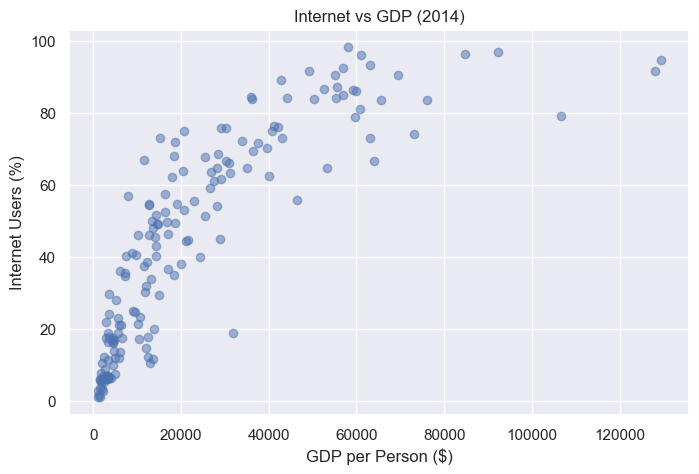

In [67]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
plt.scatter(
    gdp_and_internet_use_2014['GDP_Per_Capita'],
    gdp_and_internet_use_2014['Internet_Users_Pct'],
    alpha=0.5
)

plt.title('Internet vs GDP (2014)')
plt.xlabel('GDP per Person ($)')
plt.ylabel('Internet Users (%)')
plt.grid(True)

plt.show()

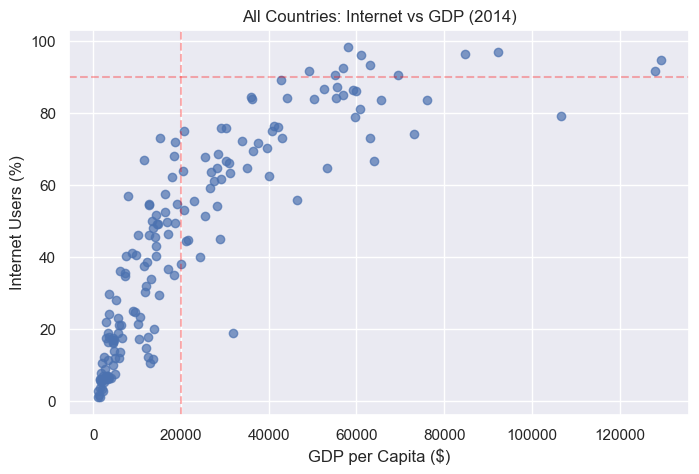

In [68]:
plt.figure(figsize=(8,5))
plt.scatter(
    gdp_and_internet_use_2014['GDP_Per_Capita'],
    gdp_and_internet_use_2014['Internet_Users_Pct'],
    alpha=0.7)
plt.title('All Countries: Internet vs GDP (2014)')
plt.xlabel('GDP per Capita ($)')
plt.ylabel('Internet Users (%)')
plt.axvline(20000, color='red', linestyle='--', alpha=0.3)  
plt.axhline(90, color='red', linestyle='--', alpha=0.3)  
plt.show()

In [69]:
gdp_and_internet_use_2014[
    (gdp_and_internet_use_2014['Internet_Users_Pct'] > 75) & 
    (gdp_and_internet_use_2014['GDP_Per_Capita'] < 30000)
].sort_values('Internet_Users_Pct', ascending=False)

,Country,Year,Internet_Users_Pct,GDP_Per_Capita,_merge
4838,Latvia,2014,75.8261,29217.459341,both


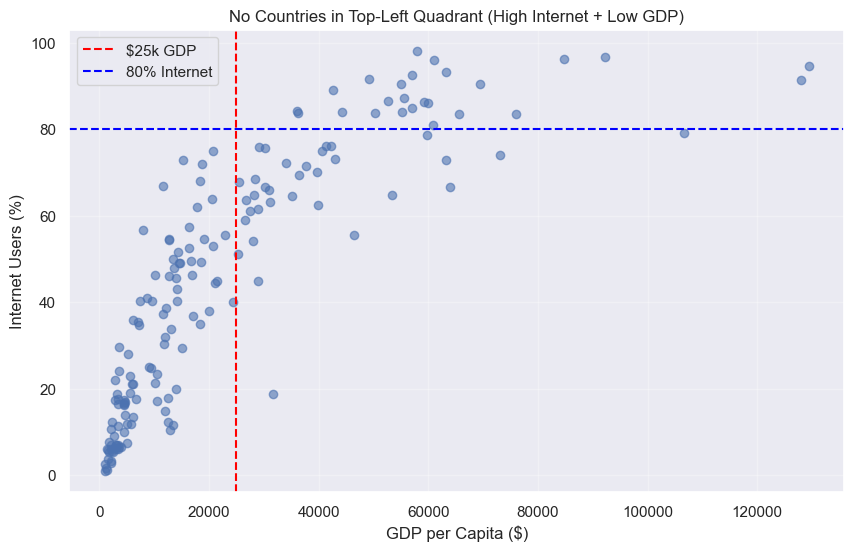

In [70]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
plt.scatter(
    gdp_and_internet_use_2014['GDP_Per_Capita'],
    gdp_and_internet_use_2014['Internet_Users_Pct'],
    alpha=0.6)
plt.axvline(25000, color='red', linestyle='--', label='$25k GDP')
plt.axhline(80, color='blue', linestyle='--', label='80% Internet')
plt.title("No Countries in Top-Left Quadrant (High Internet + Low GDP)")
plt.xlabel("GDP per Capita ($)")
plt.ylabel("Internet Users (%)")
plt.legend()
plt.grid(alpha=0.3)
plt.show()

24. **Stretch Question:** Use the `qcut` function from pandas (https://pandas.pydata.org/docs/reference/api/pandas.qcut.html) to divide countries in `gdp_per_capita_2014` into three groups based on their GDP per capita values. Label these groups as "Low", "Medium", and "High". Put these labels in a new column, named "GDP_group".


In [71]:
gdp_and_internet_use_2014['GDP_group'] = pd.qcut(
    gdp_and_internet_use_2014['GDP_Per_Capita'],
    q=3,
    labels=['Low', 'Medium', 'High'])

print(gdp_and_internet_use_2014[['Country', 'GDP_Per_Capita', 'GDP_group']].head())
print(gdp_and_internet_use_2014.groupby('GDP_group', observed=False)['GDP_Per_Capita'].agg(['min', 'max']))

                         Country  GDP_Per_Capita GDP_group
15                   Afghanistan     3017.942544       Low
49   Africa Eastern and Southern     4052.851526       Low
83    Africa Western and Central     4816.917355       Low
117                      Albania    12788.747231    Medium
151                      Algeria    15073.762940    Medium
                    min            max
GDP_group                             
Low          977.765840    7951.798340
Medium      8751.882806   24414.355476
High       24573.488878  162582.374111


In [72]:
gdp_and_internet_use_2014['GDP_code'] = pd.qcut(
    gdp_and_internet_use_2014['GDP_Per_Capita'],
    q=3,
    labels=False)
print(gdp_and_internet_use_2014[['Country', 'GDP_Per_Capita', 'GDP_group']].head())

                         Country  GDP_Per_Capita GDP_group
15                   Afghanistan     3017.942544       Low
49   Africa Eastern and Southern     4052.851526       Low
83    Africa Western and Central     4816.917355       Low
117                      Albania    12788.747231    Medium
151                      Algeria    15073.762940    Medium


In [73]:
print(gdp_and_internet_use_2014.groupby('GDP_group', observed=True)['GDP_Per_Capita'].agg(['min', 'max']))

                    min            max
GDP_group                             
Low          977.765840    7951.798340
Medium      8751.882806   24414.355476
High       24573.488878  162582.374111


25. **Stretch Question:** How does the median internet users percentage compare for the three gdp groups?

In [77]:
median_internet = gdp_and_internet_use_2014.groupby('GDP_group', observed=False)['Internet_Users_Pct'].median()

print("Median Internet Users Percentage by GDP Group:")
print(median_internet.to_markdown())

Median Internet Users Percentage by GDP Group:
| GDP_group   |   Internet_Users_Pct |
|:------------|---------------------:|
| Low         |              11.6    |
| Medium      |              44.5945 |
| High        |              75.98   |
